In [2]:
install.packages("wbstats")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyr")
install.packages("tidyverse")
install.packages("splines")
install.packages("zoo")

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependency ‘readr’


Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rematch’, ‘backports’, ‘data.table’, ‘gargle’, ‘cellranger’, ‘ids’, ‘selectr’, ‘broom’, ‘conflicted’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘modelr’, ‘readxl’, ‘reprex’, ‘rvest’


Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Warning message:
“package ‘splines’ is a base package, and should not be updated”
Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib

In [3]:
library(zoo)
library(wbstats)
library(dplyr)
library(ggplot2)
library(tidyr)
library(tidyverse)
library(splines)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
indicators <- c(
  "NY.GDP.MKTP.CD",    # GDP 
  "SP.POP.GROW",       # Pop Growth
  "SL.UEM.TOTL.ZS",    # Unemployment
  "NE.EXP.GNFS.CD",    # Exports of Goods and Services
  "NE.GDI.TOTL.CD",    # Gross Cap. 
  "SP.DYN.LE00.IN"     # Life Expectancy
)

#defining variables and their time-scope. 
china_data <- wb_data(country = "China", indicator = indicators, start_date = 1980, end_date = 2023, return_wide = TRUE)
india_data <- wb_data(country = "India", indicator = indicators, start_date = 1980, end_date = 2023, return_wide = TRUE)
global_data <- wb_data(country = "World", indicator = indicators, start_date = 1980, end_date = 2023, return_wide = TRUE)

In [5]:
#Cleaning Data
clean_data <- function(data) {
  data %>%
    # Select only the columns we need
    select(date, NY.GDP.MKTP.CD, SP.POP.GROW, NE.EXP.GNFS.CD, SL.UEM.TOTL.ZS, SP.DYN.LE00.IN, NE.GDI.TOTL.CD) %>%
    # Convert columns to numeric
    mutate(
      date = as.numeric(date),
      Gross_Cap = as.numeric(NE.GDI.TOTL.CD),
      GDP = as.numeric(NY.GDP.MKTP.CD),
      Pop_Growth = as.numeric(SP.POP.GROW),
      Exports = as.numeric(NE.EXP.GNFS.CD),
      Life_Expectancy = as.numeric(SP.DYN.LE00.IN)
)}

# Apply the simplified clean_data function
china_clean <- clean_data(china_data)
india_clean <- clean_data(india_data)
global_clean <- clean_data(global_data)

# Check the number of rows after cleaning
nrow(china_clean)
nrow(india_clean)
nrow(global_clean)

[1] 44

[1] 44

[1] 44

In [6]:
# Renaming 
rename_columns <- function(data) {
  data %>%
    rename(
      GDP = NY.GDP.MKTP.CD,
      Pop_Growth = SP.POP.GROW,
      Unemployment = SL.UEM.TOTL.ZS,
      Exports = NE.EXP.GNFS.CD,
      Gross_Cap = NE.GDI.TOTL.CD,
      Life_Expectancy = SP.DYN.LE00.IN
    )
}

# Add renaming to cleaned dataset
china_clean <- rename_columns(china_data)
india_clean <- rename_columns(india_data)
global_clean <- rename_columns(global_data)

str(china_clean)
str(india_clean)
str(global_clean)

tibble [44 × 10] (S3: tbl_df/tbl/data.frame)
 $ iso2c          : chr [1:44] "CN" "CN" "CN" "CN" ...
 $ iso3c          : chr [1:44] "CHN" "CHN" "CHN" "CHN" ...
 $ country        : chr [1:44] "China" "China" "China" "China" ...
 $ date           : num [1:44] 1980 1981 1982 1983 1984 ...
 $ Exports        : num [1:44] 1.94e+10 2.44e+10 2.26e+10 2.20e+10 2.48e+10 ...
  ..- attr(*, "label")= chr "Exports of goods and services (current US$)"
 $ Gross_Cap      : num [1:44] 6.61e+10 6.45e+10 6.56e+10 7.36e+10 8.94e+10 ...
  ..- attr(*, "label")= chr "Gross capital formation (current US$)"
 $ GDP            : num [1:44] 1.91e+11 1.96e+11 2.05e+11 2.31e+11 2.60e+11 ...
  ..- attr(*, "label")= chr "GDP (current US$)"
 $ Unemployment   : num [1:44] NA NA NA NA NA NA NA NA NA NA ...
  ..- attr(*, "label")= chr "Unemployment, total (% of total labor force) (modeled ILO estimate)"
 $ Life_Expectancy: num [1:44] 64.4 65 65.5 65.9 66.3 ...
  ..- attr(*, "label")= chr "Life expectancy at birth, total (y

# GDP Growth

      date        China_GDP           India_GDP           Global_GDP       
 Min.   :1980   Min.   :1.911e+11   Min.   :1.863e+11   Min.   :1.142e+13  
 1st Qu.:1991   1st Qu.:3.777e+11   1st Qu.:2.941e+11   1st Qu.:2.357e+13  
 Median :2002   Median :1.405e+12   Median :5.002e+11   Median :3.438e+13  
 Mean   :2002   Mean   :4.741e+12   Mean   :1.108e+12   Mean   :4.705e+13  
 3rd Qu.:2012   3rd Qu.:8.792e+12   3rd Qu.:1.835e+12   3rd Qu.:7.542e+13  
 Max.   :2023   Max.   :1.788e+13   Max.   :3.550e+12   Max.   :1.054e+14  
 log_China_GDP   log_India_GDP   log_Global_GDP 
 Min.   :25.98   Min.   :25.95   Min.   :30.07  
 1st Qu.:26.66   1st Qu.:26.41   1st Qu.:30.79  
 Median :27.97   Median :26.94   Median :31.17  
 Mean   :28.19   Mean   :27.28   Mean   :31.27  
 3rd Qu.:29.80   3rd Qu.:28.24   3rd Qu.:31.95  
 Max.   :30.51   Max.   :28.90   Max.   :32.29  

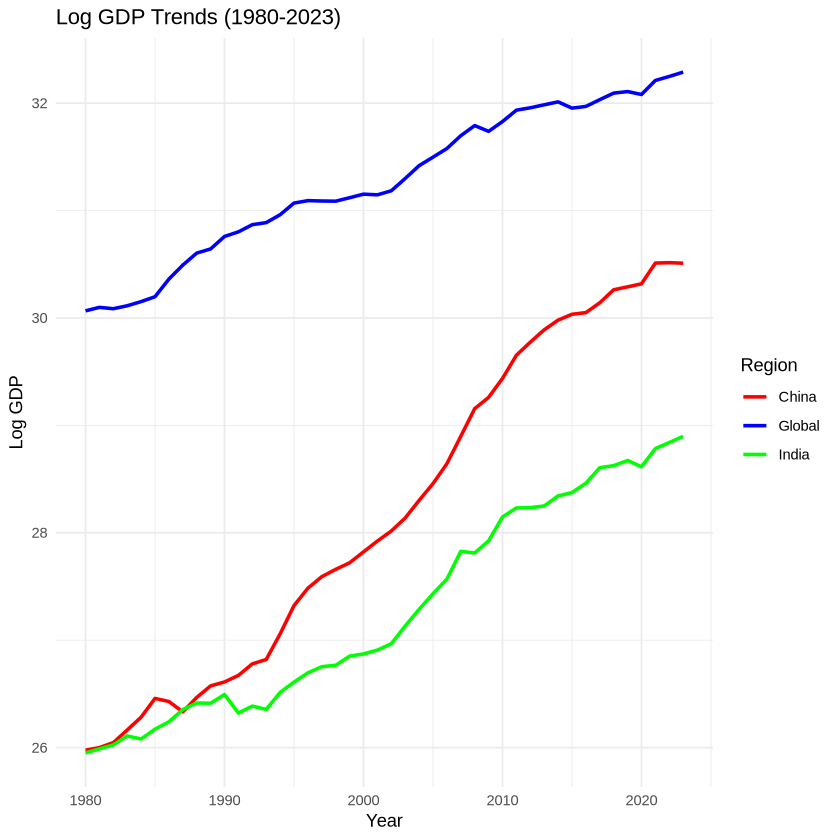

In [7]:
# GDP DF
gdp_data <- data.frame(
  date = china_clean$date,
  China_GDP = china_clean$GDP,
  India_GDP = india_clean$GDP,
  Global_GDP = global_clean$GDP
)

# log to GDP values - makes it easier to compare by standardizing large differences
gdp_data <- gdp_data %>%
  mutate(
    log_China_GDP = log(China_GDP),
    log_India_GDP = log(India_GDP),
    log_Global_GDP = log(Global_GDP)
  )
summary(gdp_data)

# Plot the GDP
ggplot(gdp_data, aes(x = date)) +
  geom_line(aes(y = log_China_GDP, color = "China", group = 1), linewidth = 1) +
  geom_line(aes(y = log_India_GDP, color = "India", group = 1), linewidth = 1) +
  geom_line(aes(y = log_Global_GDP, color = "Global", group = 1), linewidth = 1) +
scale_color_manual(
    values = c(
        "China" = "red", 
        "India" = "green", 
        "Global" = "blue"
    )
) +
  labs(title = "Log GDP Trends (1980-2023)",
       x = "Year",
       y = "Log GDP",
       color = "Region") +
  theme_minimal()

In [8]:
# Linear Reg. Model of GDP-Date 
GDP_model_china <- lm(log_China_GDP ~ date, gdp_data)
print("Summary for China:")
summary(GDP_model_china)

GDP_model_india <- lm(log_India_GDP ~ date, gdp_data)
print("Summary for India:")
summary(GDP_model_india)


GDP_model_global <- lm(log_Global_GDP ~ date, gdp_data)
print("Summary for Global:")
summary(GDP_model_global)

[1] "Summary for China:"



Call:
lm(formula = log_China_GDP ~ date, data = gdp_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34747 -0.17457 -0.05151  0.19967  0.37372 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.129e+02  4.891e+00  -43.52   <2e-16 ***
date         1.204e-01  2.444e-03   49.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2058 on 42 degrees of freedom
Multiple R-squared:  0.983,	Adjusted R-squared:  0.9826 
F-statistic:  2429 on 1 and 42 DF,  p-value: < 2.2e-16


[1] "Summary for India:"



Call:
lm(formula = log_India_GDP ~ date, data = gdp_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35018 -0.18045  0.07182  0.13016  0.27908 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.225e+02  4.387e+00  -27.91   <2e-16 ***
date         7.481e-02  2.192e-03   34.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1846 on 42 degrees of freedom
Multiple R-squared:  0.9652,	Adjusted R-squared:  0.9644 
F-statistic:  1165 on 1 and 42 DF,  p-value: < 2.2e-16


[1] "Summary for Global:"



Call:
lm(formula = log_Global_GDP ~ date, data = gdp_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.184135 -0.080070  0.005526  0.096690  0.175268 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -76.101781   2.508864  -30.33   <2e-16 ***
date          0.053644   0.001253   42.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1056 on 42 degrees of freedom
Multiple R-squared:  0.9776,	Adjusted R-squared:  0.977 
F-statistic:  1832 on 1 and 42 DF,  p-value: < 2.2e-16


[1] "Summary of the GDP Interaction Model (Relative to China):"



Call:
lm(formula = Value ~ date_centered + Global_to_China + India_to_China + 
    date_centered:Global_to_China + date_centered:India_to_China, 
    data = gdp_interaction_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35018 -0.13220  0.01306  0.12015  0.37372 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   25.602599   0.050657 505.409   <2e-16 ***
date_centered                  0.120431   0.002029  59.363   <2e-16 ***
Global_to_China                4.511129   0.071640  62.969   <2e-16 ***
India_to_China                 0.069095   0.071640   0.964    0.337    
date_centered:Global_to_China -0.066787   0.002869 -23.278   <2e-16 ***
date_centered:India_to_China  -0.045622   0.002869 -15.901   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1709 on 126 degrees of freedom
Multiple R-squared:  0.9933,	Adjusted R-squared:  0.9931 
F-statistic: 

`geom_smooth()` using formula = 'y ~ x'


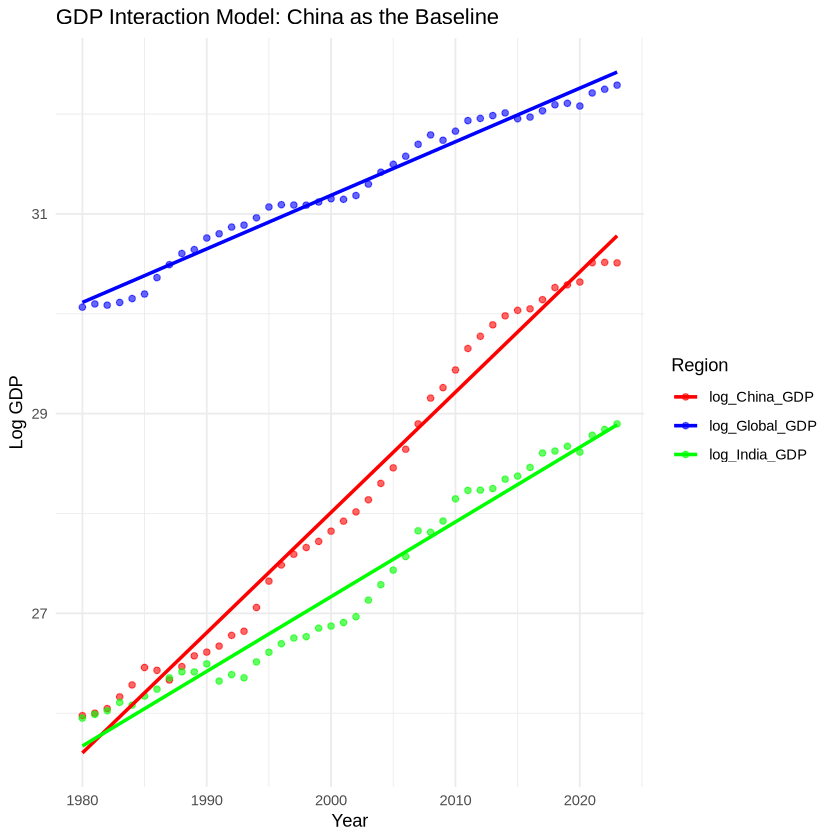

In [9]:
# Making dummy variables 
gdp_interaction_data <- gdp_data %>%
  pivot_longer(cols = c(log_China_GDP, log_India_GDP, log_Global_GDP),
               names_to = "Region",
               values_to = "Value") %>%
  mutate(
    Global_to_China = ifelse(Region == "log_Global_GDP", 1, 0),
    India_to_China = ifelse(Region == "log_India_GDP", 1, 0),
    date = as.numeric(date),
    date_centered = date - 1980
  )

# Interaction Model (Relative to China)
# Value=β0+β1×date_centered+β2×Global_to_China+β3×India_to_China+β4×(date×Global_to_China)+β5×(date×India_to_China)+ϵ
gdp_interaction_model <- lm(Value ~ date_centered + Global_to_China + India_to_China +
                            date_centered:Global_to_China + date_centered:India_to_China,
                            data = gdp_interaction_data)

# The tilde (~) symbol separates the response variable (GDP value) from the predictors (date, dummy variables, and interactions). It can be read as: "GDP value as a function of the predictors".
#Value: The response variable (the outcome being predicted), which in this model represents the GDP value of China in 1980.
#date_centered: The time predictor, measuring the trend of GDP over time, with China as the reference group. 

#Interpretation:
# Intercept/β0: Represents China at the starting date (baseline).
# β1 : Represents the China trend over time.
# β2: Difference in average GDP between the global data and China.
# β3: Difference in average GDP between India and China.
# β4: Difference in the GDP growth trend between the global data and China (Time).
# β5: Difference in the GDP growth trend between India and China (Time).


# Summary: 
print("Summary of the GDP Interaction Model (Relative to China):")
summary(gdp_interaction_model)

# Plotting it: 
ggplot(gdp_interaction_data, aes(x = date, y = Value, color = Region)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_color_manual(values = c("log_China_GDP" = "red", "log_India_GDP" = "green", "log_Global_GDP" = "blue")) +
  labs(title = "GDP Interaction Model: China as the Baseline",
       x = "Year",
       y = "Log GDP",
       color = "Region") +
  theme_minimal()

In [10]:
# Linear Reg. Model: Showing Influence of other variables on log(GDP)
model_china <- lm(log(GDP) ~ Pop_Growth + log(Exports) + Gross_Cap + Life_Expectancy, data = china_clean)
model_india <- lm(log(GDP) ~ Pop_Growth + log(Exports) + Gross_Cap + Life_Expectancy, data = india_clean)
model_global <- lm(log(GDP) ~ Pop_Growth + log(Exports) + Gross_Cap + Life_Expectancy, data = global_clean)

# Print 
print("Summary for China:")
print(summary(model_china))

print("Summary for India:")
print(summary(model_india))

print("Summary for Global:")
print(summary(model_global))

[1] "Summary for China:"

Call:
lm(formula = log(GDP) ~ Pop_Growth + log(Exports) + Gross_Cap + 
    Life_Expectancy, data = china_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16675 -0.08003  0.01196  0.06481  0.22303 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.458e+00  8.899e-01   9.504 1.38e-11 ***
Pop_Growth      1.552e-01  9.936e-02   1.562   0.1266    
log(Exports)    5.218e-01  7.227e-02   7.220 1.24e-08 ***
Gross_Cap       1.518e-13  1.167e-14  13.007 1.43e-15 ***
Life_Expectancy 7.560e-02  3.069e-02   2.463   0.0184 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09678 on 38 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9964,	Adjusted R-squared:  0.996 
F-statistic:  2638 on 4 and 38 DF,  p-value: < 2.2e-16

[1] "Summary for India:"

Call:
lm(formula = log(GDP) ~ Pop_Growth + log(Exports) + Gross_Cap + 
    Life_Expec

# Population Growth

      date      China_Pop_Growth  India_Pop_Growth Global_Pop_Growth
 Min.   :1980   Min.   :-0.1038   Min.   :0.6804   Min.   :0.7939   
 1st Qu.:1991   1st Qu.: 0.5554   1st Qu.:1.3235   1st Qu.:1.2218   
 Median :2002   Median : 0.7024   Median :1.7926   Median :1.3245   
 Mean   :2002   Mean   : 0.8536   Mean   :1.6831   Mean   :1.3935   
 3rd Qu.:2012   3rd Qu.: 1.2609   3rd Qu.:2.1117   3rd Qu.:1.6991   
 Max.   :2023   Max.   : 1.6101   Max.   :2.2759   Max.   :1.8092   

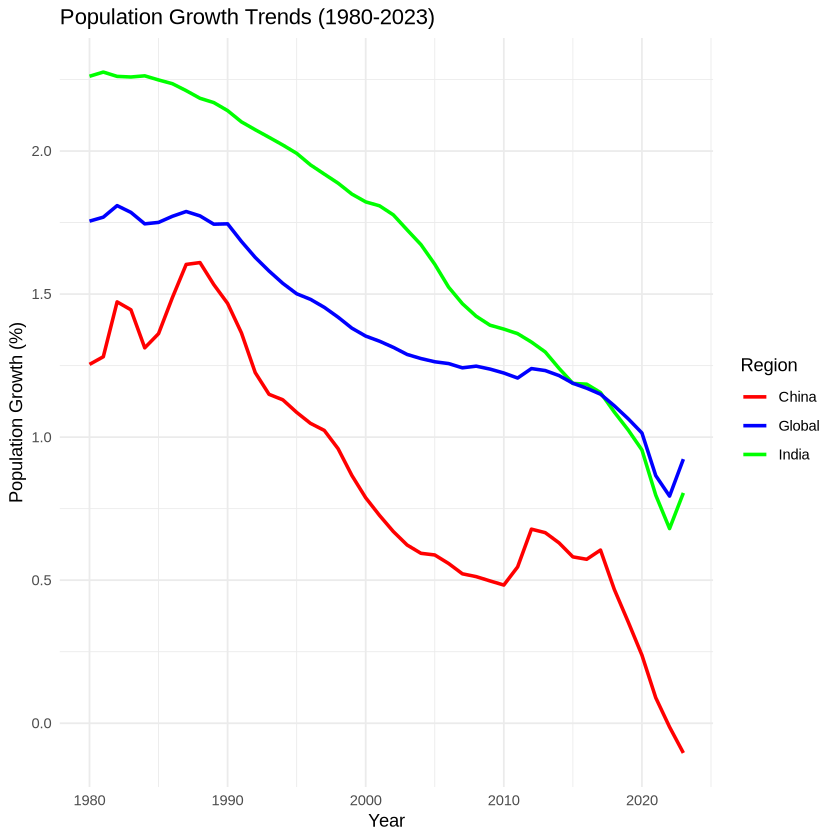

In [11]:
# Population Growth Data Frame
pop_growth_data <- data.frame(
  date = china_clean$date,
  China_Pop_Growth = china_clean$Pop_Growth,
  India_Pop_Growth = india_clean$Pop_Growth,
  Global_Pop_Growth = global_clean$Pop_Growth
)

# Summary
summary(pop_growth_data)

# Plot Population Growth
ggplot(pop_growth_data, aes(x = date)) +
  geom_line(aes(y = China_Pop_Growth, color = "China", group = 1), linewidth = 1) +
  geom_line(aes(y = India_Pop_Growth, color = "India", group = 1), linewidth = 1) +
  geom_line(aes(y = Global_Pop_Growth, color = "Global", group = 1), linewidth = 1) +
  scale_color_manual(
    values = c(
        "China" = "red", 
        "India" = "green", 
        "Global" = "blue"
    )
) +
  labs(title = "Population Growth Trends (1980-2023)",
       x = "Year",
       y = "Population Growth (%)",
       color = "Region") +
  theme_minimal()

[1] "Summary of the Population Growth Interaction Model (Relative to China):"



Call:
lm(formula = Value ~ date_centered + Global_to_China + India_to_China + 
    date_centered:Global_to_China + date_centered:India_to_China, 
    data = pop_growth_interaction_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.310209 -0.065864  0.005926  0.068070  0.310140 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1.564430   0.033630  46.519  < 2e-16 ***
date_centered                 -0.033062   0.001347 -24.549  < 2e-16 ***
Global_to_China                0.285885   0.047560   6.011 1.85e-08 ***
India_to_China                 0.903075   0.047560  18.988  < 2e-16 ***
date_centered:Global_to_China  0.011817   0.001905   6.204 7.28e-09 ***
date_centered:India_to_China  -0.003424   0.001905  -1.798   0.0746 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1134 on 126 degrees of freedom
Multiple R-squared:  0.9569,	Adjusted R-squared:  0.95

`geom_smooth()` using formula = 'y ~ x'


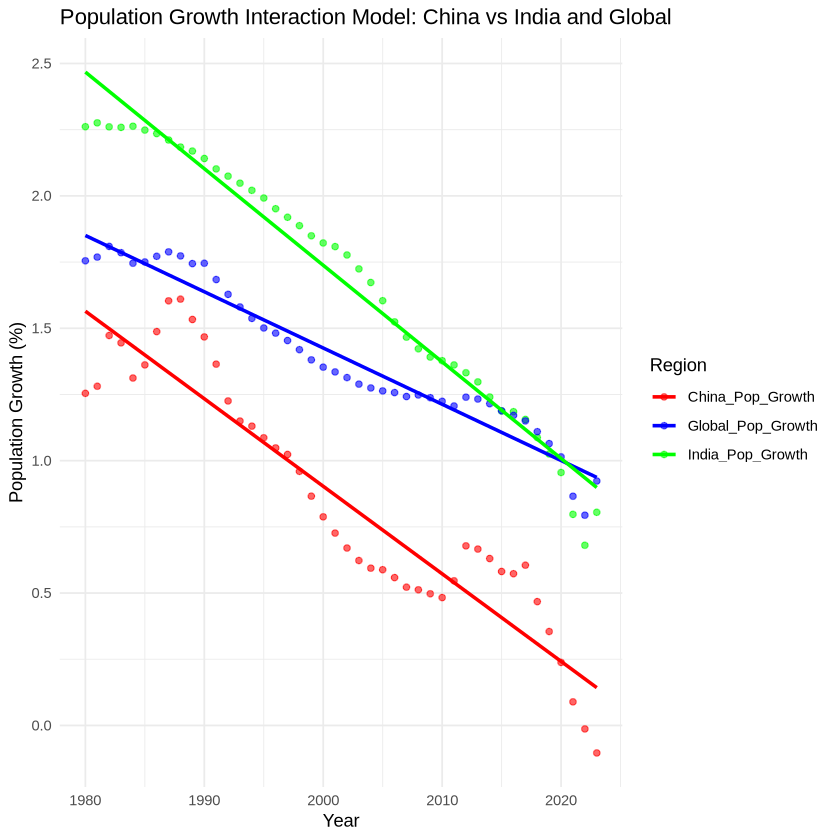

In [12]:
pop_growth_interaction_data <- pop_growth_data %>%
  pivot_longer(cols = c(China_Pop_Growth, India_Pop_Growth, Global_Pop_Growth),
               names_to = "Region",
               values_to = "Value") %>%
  mutate(
    Global_to_China = ifelse(Region == "Global_Pop_Growth", 1, 0),
    India_to_China = ifelse(Region == "India_Pop_Growth", 1, 0),
    date = as.numeric(date),
    date_centered = date - 1980
  )

# Interaction Model (Relative to China)
pop_growth_interaction_model <- lm(Value ~ date_centered + Global_to_China + India_to_China +
                                   date_centered:Global_to_China + date_centered:India_to_China,
                                   data = pop_growth_interaction_data)

# print
print("Summary of the Population Growth Interaction Model (Relative to China):")
summary(pop_growth_interaction_model)

# Plotting it:
ggplot(pop_growth_interaction_data, aes(x = date, y = Value, color = Region)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_color_manual(values = c("China_Pop_Growth" = "red", 
                                "India_Pop_Growth" = "green", 
                                "Global_Pop_Growth" = "blue")) +
  labs(title = "Population Growth Interaction Model: China vs India and Global",
       x = "Year",
       y = "Population Growth (%)",
       color = "Region") +
  theme_minimal()

# Gross Capital Formation

      date      China_Gross_Cap     India_Gross_Cap     Global_Gross_Cap   
 Min.   :1980   Min.   :6.454e+10   Min.   :3.644e+10   Min.   :2.829e+12  
 1st Qu.:1991   1st Qu.:1.322e+11   1st Qu.:7.880e+10   1st Qu.:5.980e+12  
 Median :2002   Median :4.760e+11   Median :1.505e+11   Median :8.049e+12  
 Mean   :2002   Mean   :1.919e+12   Mean   :3.632e+11   Mean   :1.161e+13  
 3rd Qu.:2012   3rd Qu.:3.734e+12   3rd Qu.:6.798e+11   3rd Qu.:1.896e+13  
 Max.   :2023   Max.   :7.715e+12   Max.   :1.198e+12   Max.   :2.781e+13  
                NA's   :1                               NA's   :1          
 log_China_Gross_Cap log_India_Gross_Cap log_Global_Gross_Cap
 Min.   :24.89       Min.   :24.32       Min.   :28.67       
 1st Qu.:25.61       1st Qu.:25.09       1st Qu.:29.42       
 Median :26.89       Median :25.74       Median :29.72       
 Mean   :27.20       Mean   :26.06       Mean   :29.86       
 3rd Qu.:28.95       3rd Qu.:27.25       3rd Qu.:30.57       
 Max.   :29.67      

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


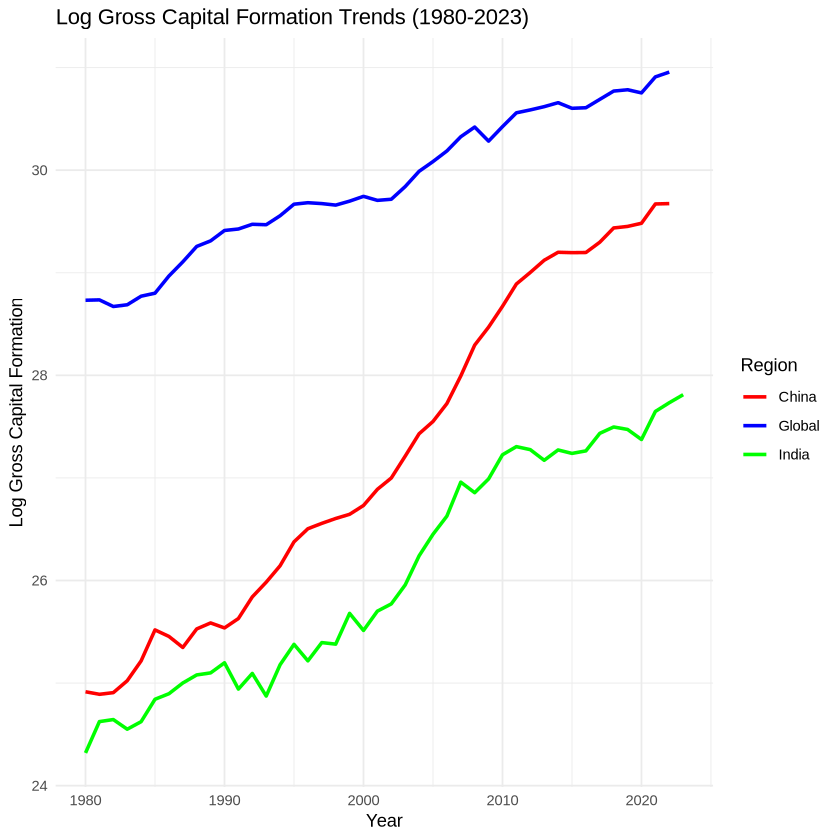

In [13]:

# Gross Capital Formation DF
gross_cap_data <- data.frame(
  date = china_clean$date,
  China_Gross_Cap = china_clean$Gross_Cap,
  India_Gross_Cap = india_clean$Gross_Cap,
  Global_Gross_Cap = global_clean$Gross_Cap
)

# Log Transform
gross_cap_data <- gross_cap_data %>%
  mutate(
    log_China_Gross_Cap = log(China_Gross_Cap),
    log_India_Gross_Cap = log(India_Gross_Cap),
    log_Global_Gross_Cap = log(Global_Gross_Cap)
  ) 

# Summary
summary(gross_cap_data)

# Plot 
ggplot(gross_cap_data, aes(x = date)) +
  geom_line(aes(y = log_China_Gross_Cap, color = "China", group = 1), linewidth = 1) +
  geom_line(aes(y = log_India_Gross_Cap, color = "India", group = 1), linewidth = 1) +
  geom_line(aes(y = log_Global_Gross_Cap, color = "Global", group = 1), linewidth = 1) +
  scale_color_manual(
    values = c(
        "China" = "red", 
        "India" = "green", 
        "Global" = "blue"
    )
) +
  labs(title = "Log Gross Capital Formation Trends (1980-2023)",
       x = "Year",
       y = "Log Gross Capital Formation",
       color = "Region") +
  theme_minimal()

In [14]:
#Linear Regression Models:   
gross_cap_model_china <- lm(log_China_Gross_Cap ~ date, gross_cap_data)
print("Summary for China:")
summary(gross_cap_model_china)

gross_cap_model_india <- lm(log_India_Gross_Cap ~ date, gross_cap_data)
print("Summary for India:")
summary(gross_cap_model_india)

gross_cap_model_global <- lm(Global_Gross_Cap ~ date, gross_cap_data)
print("Summary for Global:")
summary(gross_cap_model_global)

[1] "Summary for China:"



Call:
lm(formula = log_China_Gross_Cap ~ date, data = gross_cap_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34502 -0.18131 -0.05837  0.19216  0.40440 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.295e+02  5.759e+00  -39.85   <2e-16 ***
date         1.283e-01  2.878e-03   44.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2342 on 41 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9798,	Adjusted R-squared:  0.9793 
F-statistic:  1987 on 1 and 41 DF,  p-value: < 2.2e-16


[1] "Summary for India:"



Call:
lm(formula = log_India_Gross_Cap ~ date, data = gross_cap_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46640 -0.18557  0.03899  0.16692  0.43812 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.444e+02  5.808e+00  -24.86   <2e-16 ***
date         8.515e-02  2.902e-03   29.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2444 on 42 degrees of freedom
Multiple R-squared:  0.9535,	Adjusted R-squared:  0.9524 
F-statistic: 861.2 on 1 and 42 DF,  p-value: < 2.2e-16


[1] "Summary for Global:"



Call:
lm(formula = Global_Gross_Cap ~ date, data = gross_cap_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.135e+12 -1.276e+12  2.403e+11  1.356e+12  4.207e+12 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.131e+15  4.907e+13  -23.05   <2e-16 ***
date         5.709e+11  2.452e+10   23.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.995e+12 on 41 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9297,	Adjusted R-squared:  0.928 
F-statistic: 542.1 on 1 and 41 DF,  p-value: < 2.2e-16


[1] "Summary of the Gross Capital Formation Interaction Model (Relative to China):"



Call:
lm(formula = Value ~ date_centered + Global_to_China + India_to_China + 
    date_centered:Global_to_China + date_centered:India_to_China, 
    data = gross_cap_interaction_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46640 -0.15305 -0.01403  0.13315  0.43812 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   24.510750   0.061557  398.18  < 2e-16 ***
date_centered                  0.128278   0.002524   50.83  < 2e-16 ***
Global_to_China                4.188833   0.087055   48.12  < 2e-16 ***
India_to_China                -0.277865   0.086576   -3.21  0.00169 ** 
date_centered:Global_to_China -0.073017   0.003569  -20.46  < 2e-16 ***
date_centered:India_to_China  -0.043127   0.003509  -12.29  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2054 on 124 degrees of freedom
Multiple R-squared:  0.9898,	Adjusted R-squared:  0.9894 
F-stati

`geom_smooth()` using formula = 'y ~ x'


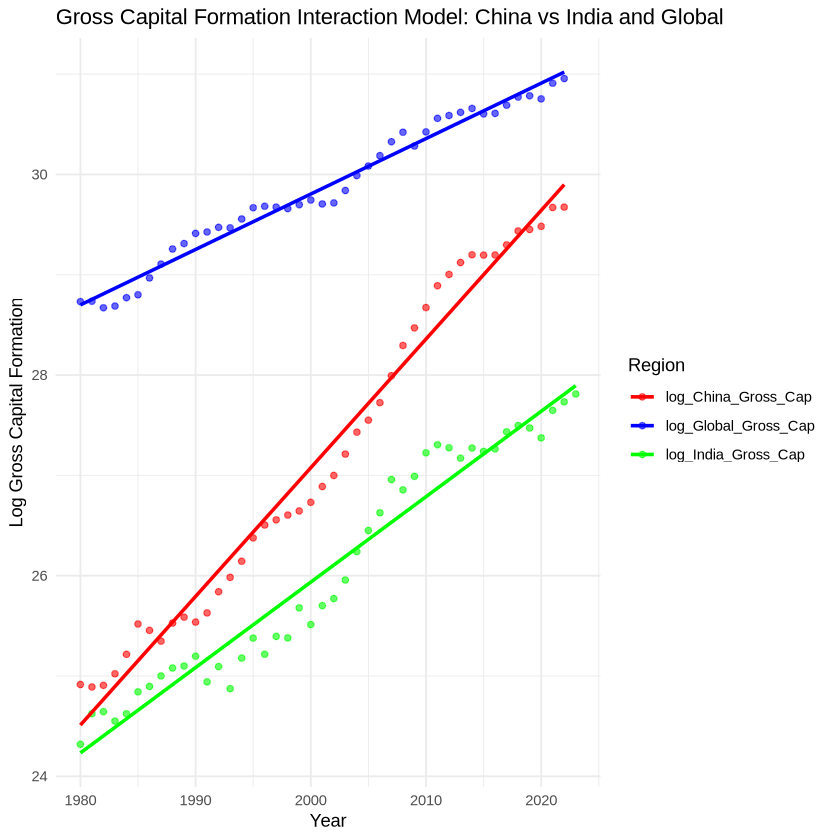

In [15]:
gross_cap_interaction_data <- gross_cap_data %>%
  pivot_longer(cols = c(log_China_Gross_Cap, log_India_Gross_Cap, log_Global_Gross_Cap),
               names_to = "Region",
               values_to = "Value") %>%
  mutate(
    Global_to_China = ifelse(Region == "log_Global_Gross_Cap", 1, 0),
    India_to_China = ifelse(Region == "log_India_Gross_Cap", 1, 0),
    date = as.numeric(date),
    date_centered = date - 1980
  ) %>%
  drop_na(Value)

# Interaction Model (Relative to China)
gross_cap_interaction_model <- lm(Value ~ date_centered + Global_to_China + India_to_China +
                                  date_centered:Global_to_China + date_centered:India_to_China,
                                  data = gross_cap_interaction_data)

#summary
print("Summary of the Gross Capital Formation Interaction Model (Relative to China):")
summary(gross_cap_interaction_model)


# Plotting
ggplot(gross_cap_interaction_data, aes(x = date, y = Value, color = Region)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_color_manual(values = c("log_China_Gross_Cap" = "red", 
                                "log_India_Gross_Cap" = "green", 
                                "log_Global_Gross_Cap" = "blue")) +
  labs(title = "Gross Capital Formation Interaction Model: China vs India and Global",
       x = "Year",
       y = "Log Gross Capital Formation",
       color = "Region") +
  theme_minimal()

# Life Expectancy

      date      China_Life_Expectancy India_Life_Expectancy
 Min.   :1980   Min.   :64.42         Min.   :53.61        
 1st Qu.:1991   1st Qu.:68.09         1st Qu.:58.85        
 Median :2002   Median :72.61         Median :63.09        
 Mean   :2002   Mean   :72.13         Mean   :62.97        
 3rd Qu.:2012   3rd Qu.:76.05         3rd Qu.:67.30        
 Max.   :2023   Max.   :78.59         Max.   :70.91        
                NA's   :1             NA's   :1            
 Global_Life_Expectancy
 Min.   :62.23         
 1st Qu.:65.26         
 Median :68.05         
 Mean   :68.00         
 3rd Qu.:71.15         
 Max.   :72.98         
 NA's   :1             

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


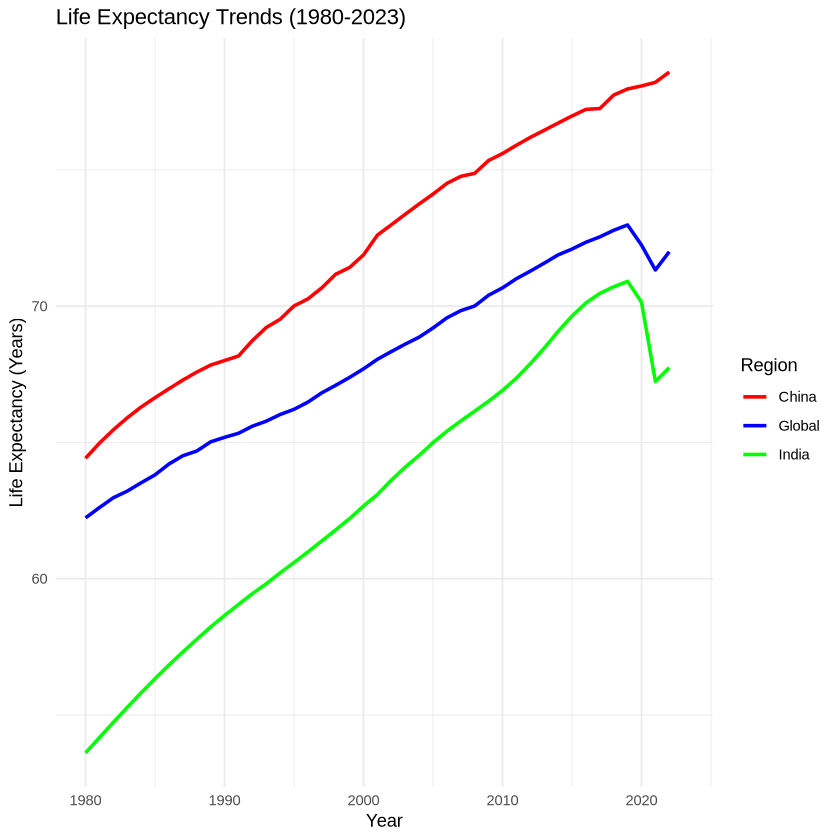

In [16]:
# Life Expectancy DF
life_expectancy_data <- data.frame(
  date = china_clean$date,
  China_Life_Expectancy = china_clean$Life_Expectancy,
  India_Life_Expectancy = india_clean$Life_Expectancy,
  Global_Life_Expectancy = global_clean$Life_Expectancy
  ) 

# Summary
summary(life_expectancy_data)

# Plot
ggplot(life_expectancy_data, aes(x = date)) +
  geom_line(aes(y = China_Life_Expectancy, color = "China", group = 1), linewidth = 1) +
  geom_line(aes(y = India_Life_Expectancy, color = "India", group = 1), linewidth = 1) +
  geom_line(aes(y = Global_Life_Expectancy, color = "Global", group = 1), linewidth = 1) +
  scale_color_manual(
    values = c(
        "China" = "red", 
        "India" = "green", 
        "Global" = "blue"
    )
) +
  labs(title = "Life Expectancy Trends (1980-2023)",
       x = "Year",
       y = "Life Expectancy (Years)",
       color = "Region") +
  theme_minimal()

In [17]:
#Linear Regression Models:

LE_model_china <- lm(China_Life_Expectancy ~ date, life_expectancy_data)
print("Summary for China:")
summary(LE_model_china)

LE_model_india <- lm(India_Life_Expectancy ~ date, life_expectancy_data)
print("Summary for India:")
summary(LE_model_india)

LE_model_global <- lm(Global_Life_Expectancy ~ date, life_expectancy_data)
print("Summary for Global:")
summary(LE_model_global)


[1] "Summary for China:"



Call:
lm(formula = China_Life_Expectancy ~ date, data = life_expectancy_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82634 -0.22195 -0.01156  0.29061  0.64631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.188e+02  9.255e+00  -66.86   <2e-16 ***
date         3.453e-01  4.625e-03   74.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3764 on 41 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9927,	Adjusted R-squared:  0.9925 
F-statistic:  5574 on 1 and 41 DF,  p-value: < 2.2e-16


[1] "Summary for India:"



Call:
lm(formula = India_Life_Expectancy ~ date, data = life_expectancy_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8274  0.0225  0.1193  0.3657  1.0736 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -747.00305   23.53563  -31.74   <2e-16 ***
date           0.40478    0.01176   34.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9571 on 41 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9665,	Adjusted R-squared:  0.9657 
F-statistic:  1184 on 1 and 41 DF,  p-value: < 2.2e-16


[1] "Summary for Global:"



Call:
lm(formula = Global_Life_Expectancy ~ date, data = life_expectancy_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86221 -0.12000  0.05729  0.29330  0.50743 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.511e+02  1.124e+01  -40.14   <2e-16 ***
date         2.594e-01  5.616e-03   46.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.457 on 41 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9811,	Adjusted R-squared:  0.9807 
F-statistic:  2134 on 1 and 41 DF,  p-value: < 2.2e-16


[1] "Summary of the Life Expectancy Interaction Model (Relative to China):"



Call:
lm(formula = Value ~ date_centered + Global_to_China + India_to_China + 
    date_centered:Global_to_China + date_centered:India_to_China, 
    data = life_expectancy_interaction_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8274 -0.1408  0.0573  0.3254  1.0736 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    64.879629   0.194772 333.106  < 2e-16 ***
date_centered                   0.345310   0.007985  43.246  < 2e-16 ***
Global_to_China                -2.327495   0.275449  -8.450 6.95e-14 ***
India_to_China                -10.408462   0.275449 -37.787  < 2e-16 ***
date_centered:Global_to_China  -0.085865   0.011292  -7.604 6.39e-12 ***
date_centered:India_to_China    0.059475   0.011292   5.267 5.99e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6498 on 123 degrees of freedom
Multiple R-squared:  0.9876,	Adjusted R-squared:  0.9871 
F-st

`geom_smooth()` using formula = 'y ~ x'


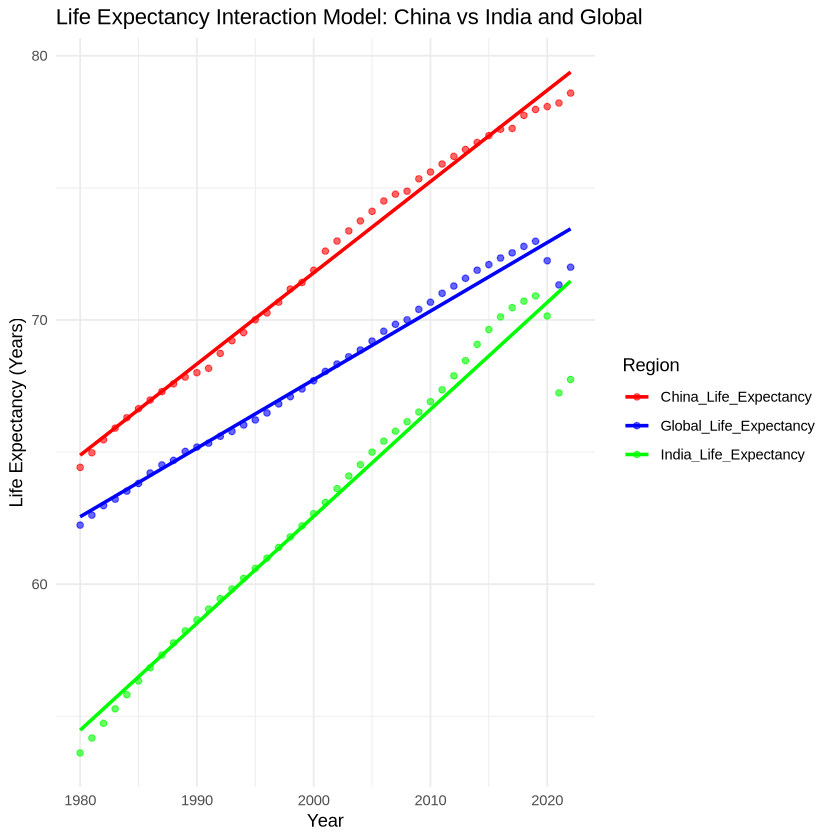

In [18]:
life_expectancy_interaction_data <- life_expectancy_data %>%
  pivot_longer(cols = c(China_Life_Expectancy, India_Life_Expectancy, Global_Life_Expectancy),
               names_to = "Region",
               values_to = "Value") %>%
  mutate(
    Global_to_China = ifelse(Region == "Global_Life_Expectancy", 1, 0),
    India_to_China = ifelse(Region == "India_Life_Expectancy", 1, 0),
    date = as.numeric(date),
    date_centered = date - 1980
  ) %>%
  drop_na(Value)

# Interaction Model (Relative to China)
life_expectancy_interaction_model <- lm(Value ~ date_centered + Global_to_China + India_to_China +
                                         date_centered:Global_to_China + date_centered:India_to_China,
                                         data = life_expectancy_interaction_data)

# Summary 
print("Summary of the Life Expectancy Interaction Model (Relative to China):")
summary(life_expectancy_interaction_model)


# Plotting 
ggplot(life_expectancy_interaction_data, aes(x = date, y = Value, color = Region)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_color_manual(values = c("China_Life_Expectancy" = "red", 
                                "India_Life_Expectancy" = "green", 
                                "Global_Life_Expectancy" = "blue")) +
  labs(title = "Life Expectancy Interaction Model: China vs India and Global",
       x = "Year",
       y = "Life Expectancy (Years)",
       color = "Region") +
  theme_minimal()

# Exports

      date      China_Exports       India_Exports       Global_Exports     
 Min.   :1980   Min.   :1.941e+10   Min.   :1.144e+10   Min.   :2.131e+12  
 1st Qu.:1991   1st Qu.:5.394e+10   1st Qu.:2.287e+10   1st Qu.:4.428e+12  
 Median :2002   Median :3.025e+11   Median :6.721e+10   Median :8.030e+12  
 Mean   :2002   Mean   :1.037e+12   Mean   :2.148e+11   Mean   :1.251e+13  
 3rd Qu.:2012   3rd Qu.:2.181e+12   3rd Qu.:4.416e+11   3rd Qu.:2.162e+13  
 Max.   :2023   Max.   :3.718e+12   Max.   :7.780e+11   Max.   :3.140e+13  
 log_China_Exports log_India_Exports log_Global_Exports
 Min.   :23.69     Min.   :23.16     Min.   :28.39     
 1st Qu.:24.71     1st Qu.:23.85     1st Qu.:29.12     
 Median :26.43     Median :24.93     Median :29.71     
 Mean   :26.50     Mean   :25.22     Mean   :29.82     
 3rd Qu.:28.41     3rd Qu.:26.81     3rd Qu.:30.70     
 Max.   :28.94     Max.   :27.38     Max.   :31.08     

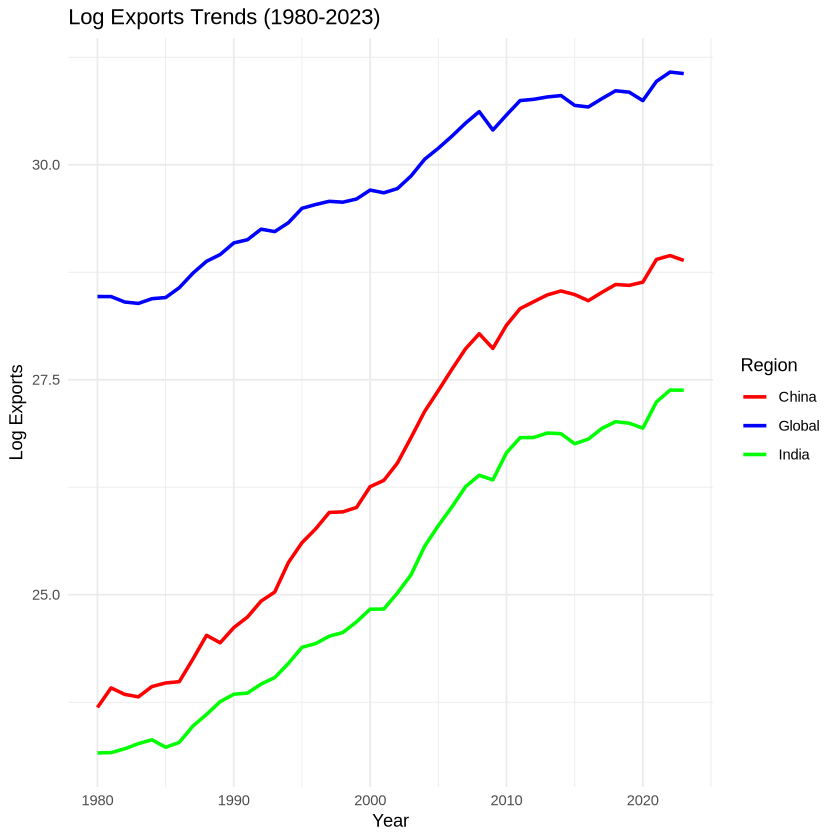

In [19]:
# Exports DF
exports_data <- data.frame(
  date = china_clean$date,
  China_Exports = china_clean$Exports,
  India_Exports = india_clean$Exports,
  Global_Exports = global_clean$Exports
)

# Log Transform
exports_data <- exports_data %>%
  mutate(
    log_China_Exports = log(China_Exports),
    log_India_Exports = log(India_Exports),
    log_Global_Exports = log(Global_Exports)
  )

# Summary
summary(exports_data)

# Plot 
ggplot(exports_data, aes(x = date)) +
  geom_line(aes(y = log_China_Exports, color = "China", group = 1), linewidth = 1) +
  geom_line(aes(y = log_India_Exports, color = "India", group = 1), linewidth = 1) +
  geom_line(aes(y = log_Global_Exports, color = "Global", group = 1), linewidth = 1) +
  scale_color_manual(
    values = c(
        "China" = "red", 
        "India" = "green", 
        "Global" = "blue"
    )
) +
  labs(title = "Log Exports Trends (1980-2023)",
       x = "Year",
       y = "Log Exports",
       color = "Region") +
  theme_minimal()

In [20]:
#Linear Regression Models:
exports_model_china <- lm(log_China_Exports ~ date, exports_data)
print("Summary for China:")
summary(exports_model_china)

exports_model_india <- lm(log_India_Exports ~ date, exports_data)
print("Summary for India:")
summary(exports_model_india)

exports_model_global <- lm(log_Global_Exports ~ date, exports_data)
print("Summary for Global:")
summary(exports_model_global)

[1] "Summary for China:"



Call:
lm(formula = log_China_Exports ~ date, data = exports_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64458 -0.22424 -0.05823  0.27092  0.61690 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.556e+02  7.403e+00  -34.52   <2e-16 ***
date         1.409e-01  3.699e-03   38.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3116 on 42 degrees of freedom
Multiple R-squared:  0.9719,	Adjusted R-squared:  0.9712 
F-statistic:  1452 on 1 and 42 DF,  p-value: < 2.2e-16


[1] "Summary for India:"



Call:
lm(formula = log_India_Exports ~ date, data = exports_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38459 -0.18407 -0.08146  0.20928  0.52668 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.020e+02  6.018e+00  -33.57   <2e-16 ***
date         1.135e-01  3.007e-03   37.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2533 on 42 degrees of freedom
Multiple R-squared:  0.9714,	Adjusted R-squared:  0.9707 
F-statistic:  1426 on 1 and 42 DF,  p-value: < 2.2e-16


[1] "Summary for Global:"



Call:
lm(formula = log_Global_Exports ~ date, data = exports_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33532 -0.11482 -0.01221  0.10049  0.35596 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.068e+02  3.734e+00  -28.61   <2e-16 ***
date         6.827e-02  1.866e-03   36.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1571 on 42 degrees of freedom
Multiple R-squared:  0.9696,	Adjusted R-squared:  0.9689 
F-statistic:  1339 on 1 and 42 DF,  p-value: < 2.2e-16


[1] "Summary of the Exports Interaction Model (Relative to China):"



Call:
lm(formula = Value ~ date_centered + Global_to_China + India_to_China + 
    date_centered:Global_to_China + date_centered:India_to_China, 
    data = exports_interaction_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64458 -0.17409 -0.04631  0.15575  0.61690 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   23.472073   0.073794 318.078  < 2e-16 ***
date_centered                  0.140932   0.002955  47.688  < 2e-16 ***
Global_to_China                4.878270   0.104360  46.745  < 2e-16 ***
India_to_China                -0.691971   0.104360  -6.631 8.83e-10 ***
date_centered:Global_to_China -0.072662   0.004179 -17.386  < 2e-16 ***
date_centered:India_to_China  -0.027386   0.004179  -6.553 1.30e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2489 on 126 degrees of freedom
Multiple R-squared:  0.9898,	Adjusted R-squared:  0.9894 
F-statist

`geom_smooth()` using formula = 'y ~ x'


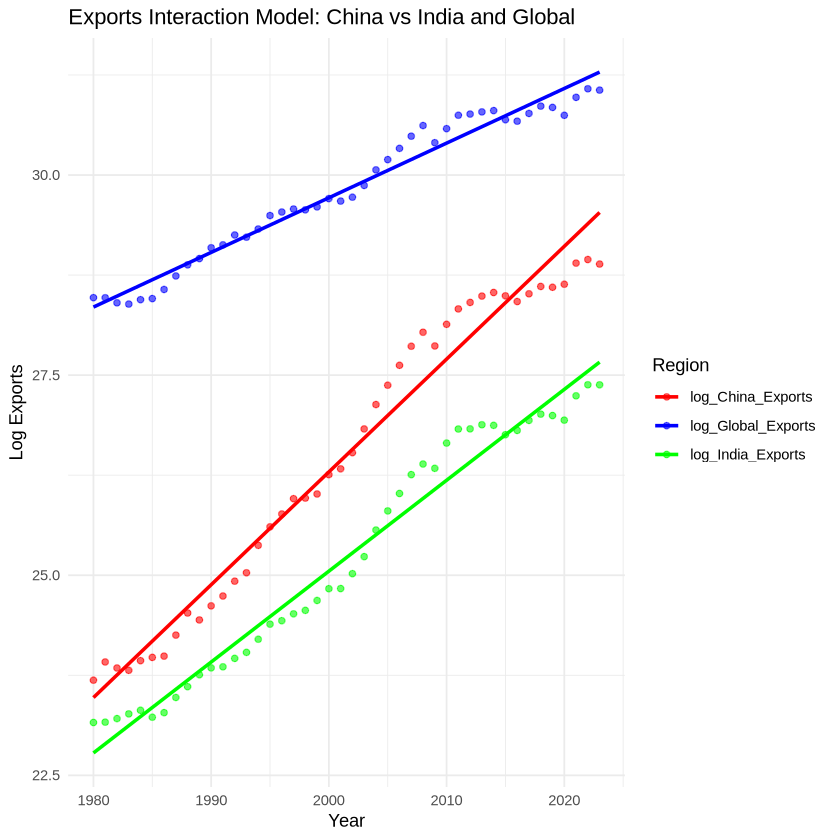

In [21]:
exports_interaction_data <- exports_data %>%
  pivot_longer(cols = c(log_China_Exports, log_India_Exports, log_Global_Exports),
               names_to = "Region",
               values_to = "Value") %>%
  mutate(
    Global_to_China = ifelse(Region == "log_Global_Exports", 1, 0),
    India_to_China = ifelse(Region == "log_India_Exports", 1, 0),
    date = as.numeric(date),
    date_centered = date - 1980
  )

# Interaction Model (Relative to China)
exports_interaction_model <- lm(Value ~ date_centered + Global_to_China + India_to_China +
                                date_centered:Global_to_China + date_centered:India_to_China,
                                data = exports_interaction_data)

# Summary 
print("Summary of the Exports Interaction Model (Relative to China):")
summary(exports_interaction_model)


# Plot 
ggplot(exports_interaction_data, aes(x = date, y = Value, color = Region)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_color_manual(values = c("log_China_Exports" = "red",
                                "log_India_Exports" = "green",
                                "log_Global_Exports" = "blue")) +
  labs(title = "Exports Interaction Model: China vs India and Global",
       x = "Year",
       y = "Log Exports",
       color = "Region") +
  theme_minimal()

# Unemployment

      date      China_Unemployment India_Unemployment Global_Unemployment
 Min.   :1980   Min.   :2.370      Min.   :4.172      Min.   :4.961      
 1st Qu.:1991   1st Qu.:3.250      1st Qu.:6.990      1st Qu.:5.821      
 Median :2002   Median :4.490      Median :7.856      Median :6.034      
 Mean   :2002   Mean   :4.054      Mean   :7.560      Mean   :5.975      
 3rd Qu.:2012   3rd Qu.:4.580      3rd Qu.:8.248      3rd Qu.:6.240      
 Max.   :2023   Max.   :5.000      Max.   :8.697      Max.   :6.585      
                NA's   :11         NA's   :11         NA's   :11         

Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_line()`).”


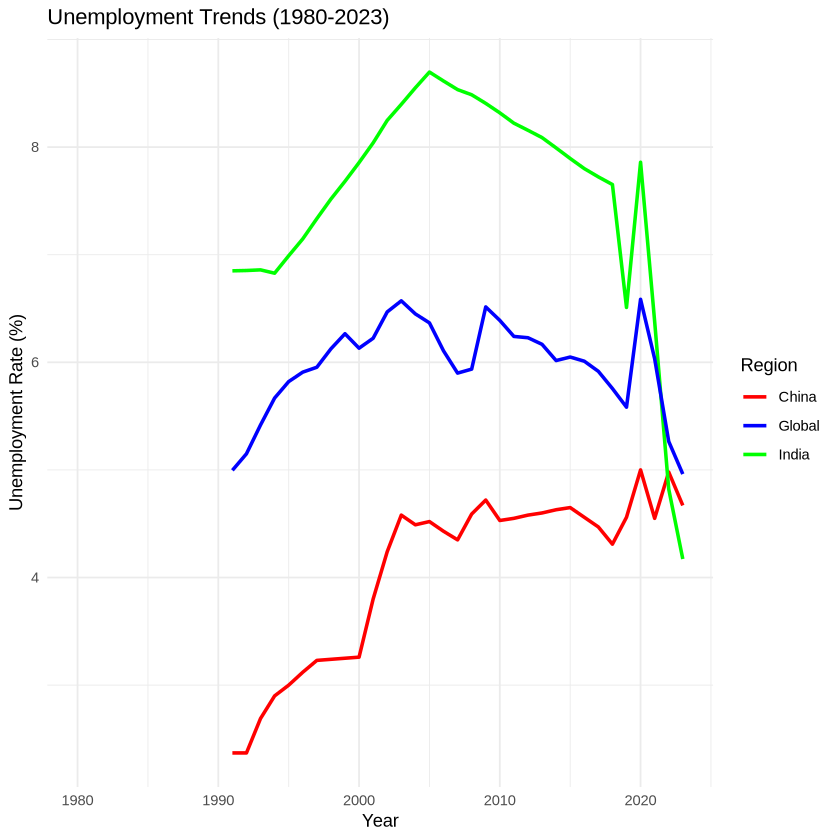

In [22]:
# Unemployment DF
unemployment_data <- data.frame(
  date = china_clean$date,
  China_Unemployment = china_clean$Unemployment,
  India_Unemployment = india_clean$Unemployment,
  Global_Unemployment = global_clean$Unemployment
) 

# Summary
summary(unemployment_data)

library(ggplot2)

# Plot 
ggplot(unemployment_data, aes(x = date)) +
  geom_line(aes(y = China_Unemployment, color = "China", group = 1), linewidth = 1) +
  geom_line(aes(y = India_Unemployment, color = "India", group = 1), linewidth = 1) +
  geom_line(aes(y = Global_Unemployment, color = "Global", group = 1), linewidth = 1) +
  scale_color_manual(
    values = c(
        "China" = "red", 
        "India" = "green", 
        "Global" = "blue"
    )
) +
  labs(title = "Unemployment Trends (1980-2023)",
       x = "Year",
       y = "Unemployment Rate (%)",
       color = "Region") +
  theme_minimal()

In [23]:
str(unemployment_data)

'data.frame':	44 obs. of  4 variables:
 $ date               : num  1980 1981 1982 1983 1984 ...
 $ China_Unemployment : num  NA NA NA NA NA NA NA NA NA NA ...
  ..- attr(*, "label")= chr "Unemployment, total (% of total labor force) (modeled ILO estimate)"
 $ India_Unemployment : num  NA NA NA NA NA NA NA NA NA NA ...
  ..- attr(*, "label")= chr "Unemployment, total (% of total labor force) (modeled ILO estimate)"
 $ Global_Unemployment: num  NA NA NA NA NA NA NA NA NA NA ...
  ..- attr(*, "label")= chr "Unemployment, total (% of total labor force) (modeled ILO estimate)"


Showing very few data values, and as it is a modeled ILO estimate, the model below is essentially an estimate on an estimate and therefore not reliable. However, the spline model below at least demonstrates some skill and know-how or perhaps it's just a huge waste of time. Probably more the latter than the former.

In [24]:
#Linear Regression Models:
unemployment_model_china <- lm(China_Unemployment ~ date, unemployment_data)
print("Summary for China:")
summary(unemployment_model_china)

unemployment_model_india <- lm(India_Unemployment ~ date, unemployment_data)
print("Summary for India:")
summary(unemployment_model_india)

unemployment_model_global <- lm(Global_Unemployment ~ date, unemployment_data)
print("Summary for Global:")
summary(unemployment_model_global)

[1] "Summary for China:"



Call:
lm(formula = China_Unemployment ~ date, data = unemployment_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6152 -0.2954 -0.1116  0.2620  0.8108 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -138.97805   14.55081  -9.551 9.48e-11 ***
date           0.07127    0.00725   9.830 4.82e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3966 on 31 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.7571,	Adjusted R-squared:  0.7493 
F-statistic: 96.63 on 1 and 31 DF,  p-value: 4.819e-11


[1] "Summary for India:"



Call:
lm(formula = India_Unemployment ~ date, data = unemployment_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0669 -0.8092  0.3637  0.7423  1.0970 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 47.82132   37.50309   1.275    0.212
date        -0.02006    0.01869  -1.074    0.291

Residual standard error: 1.022 on 31 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.03585,	Adjusted R-squared:  0.004744 
F-statistic: 1.153 on 1 and 31 DF,  p-value: 0.2913


[1] "Summary for Global:"



Call:
lm(formula = Global_Unemployment ~ date, data = unemployment_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06876 -0.11285  0.01708  0.26914  0.61006 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.945896  16.125068  -0.059    0.954
date         0.003448   0.008034   0.429    0.671

Residual standard error: 0.4395 on 31 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.005907,	Adjusted R-squared:  -0.02616 
F-statistic: 0.1842 on 1 and 31 DF,  p-value: 0.6707


[1] "Summary of the Spline Interaction Model (Relative to China):"



Call:
lm(formula = Value ~ date_centered + Global_to_China + India_to_China + 
    bs(date_centered, df = 4):Global_to_China + bs(date_centered, 
    df = 4):India_to_China, data = unemployment_interaction_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56836 -0.18554 -0.00159  0.13818  1.42266 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 2.060697   0.094726  21.754
date_centered                               0.073139   0.003794  19.280
Global_to_China                             3.035701   0.226259  13.417
India_to_China                              4.967109   0.226259  21.953
Global_to_China:bs(date_centered, df = 4)1 -1.245223   0.432680  -2.878
Global_to_China:bs(date_centered, df = 4)2  0.630450   0.372484   1.693
Global_to_China:bs(date_centered, df = 4)3 -1.702152   0.408852  -4.163
Global_to_China:bs(date_centered, df = 4)4 -2.789869   0.320425  -8.707
India_to_China:bs(da

`geom_smooth()` using formula = 'y ~ x'


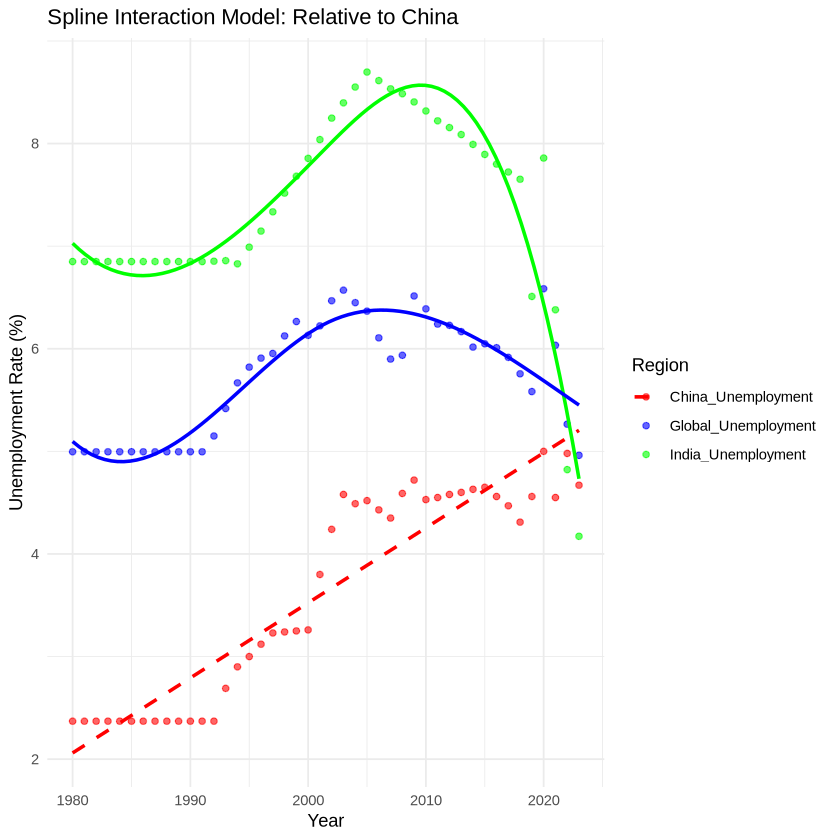

In [25]:
# Because of missing values we are using linear interpolation
# and fill remaining missing values by carrying last and first observations forward/backward
unemployment_data <- unemployment_data %>%
  mutate(
    China_Unemployment = na.approx(China_Unemployment, na.rm = FALSE),
    India_Unemployment = na.approx(India_Unemployment, na.rm = FALSE),
    Global_Unemployment = na.approx(Global_Unemployment, na.rm = FALSE)
  ) %>%
  # Fill remaining missing values
  fill(China_Unemployment, India_Unemployment, Global_Unemployment, .direction = "downup")


# Same as above - making the data fit for the model below and creating dummy variables (relative to China) and centering the date at 1980
unemployment_interaction_data <- unemployment_data %>%
  pivot_longer(cols = c(China_Unemployment, India_Unemployment, Global_Unemployment),
               names_to = "Region",
               values_to = "Value") %>%
  mutate(
    Global_to_China = ifelse(Region == "Global_Unemployment", 1, 0),
    India_to_China = ifelse(Region == "India_Unemployment", 1, 0),
    date = as.numeric(date),
    date_centered = date - 1980
  )


# Spline regression is a flexible method used to model non-linear relationships in data. It involves fitting piecewise polynomial functions (wave-like) to different sections of the data, connected at points called knots.
# With (df = 4), we balance between flexibility and overfitting the data - aligning with this research: https://stats.stackexchange.com/questions/233232/the-definition-of-natural-cubic-splines-for-regression
unemployment_interaction_model <- lm(Value ~ date_centered +
                                     Global_to_China + India_to_China +
                                     bs(date_centered, df = 4):Global_to_China +
                                     bs(date_centered, df = 4):India_to_China,
                                     data = unemployment_interaction_data)

# Summary
print("Summary of the Spline Interaction Model (Relative to China):")
summary(unemployment_interaction_model)

# Plotting the data
ggplot(unemployment_interaction_data, aes(x = date, y = Value, color = Region)) +
  geom_point(alpha = 0.6) +
  # Use linear regression for China:
  geom_smooth(data = filter(unemployment_interaction_data, Region == "China_Unemployment"), 
              method = "lm", se = FALSE, linetype = "dashed") +
  # Use spline regression for India and Global:
  geom_smooth(data = filter(unemployment_interaction_data, Region == "India_Unemployment"), 
              method = "lm", formula = y ~ splines::bs(x, df = 4), se = FALSE, color = "green") +
  geom_smooth(data = filter(unemployment_interaction_data, Region == "Global_Unemployment"), 
              method = "lm", formula = y ~ splines::bs(x, df = 4), se = FALSE, color = "blue") +
  # Making it prettier
  scale_color_manual(values = c("China_Unemployment" = "red",
                                "India_Unemployment" = "green",
                                "Global_Unemployment" = "blue")) +
  labs(title = "Spline Interaction Model: Relative to China",
       x = "Year",
       y = "Unemployment Rate (%)",
       color = "Region") +
  theme_minimal()